# Python part 1

This notebooks looks for the inflammation data files in the subfolder `/data`

# 1. Python fundamentals

## 1.1 Variables

In [1]:
3 + 5 * 4

23

In [2]:
weight_kg = 60 # integer

From now on, whenever we use weight_kg, Python will substitute the value we assigned to it. In layman’s terms, a variable is a name for a value.

In Python, variable names:

* can include letters, digits, and underscores
* cannot start with a digit
* are case sensitive.

This means that, for example:

* `weight0` is a valid variable name, whereas `0weight` is not
* `weight` and `Weight` are different variables

### Types of data

In [3]:
weight_kg = 60.3 # floating point

In [4]:
patient_id = '001' # string

### Using variables in Python

In [5]:
weight_lb = 2.2 * weight_kg

In [6]:
patient_id = 'inflam_' + patient_id

### Build-in Python functions

To carry out common tasks with data and variables in Python, the language provides us with several built-in functions. To display information to the screen, we use the print function:

In [7]:
print(weight_lb)
print(patient_id)

132.66
inflam_001


We can also call a function inside of another function call. For example, Python has a built-in function called type that tells you a value’s data type:

In [8]:
# Determine the variable type
print(type(weight_lb))
print(type(patient_id))

<class 'float'>
<class 'str'>


In [9]:
# Automatic type determination
x = 4 / 3 
print(type(x))

<class 'float'>


## 1.2 Python lists

List: storing multiple valies inside a variable

In [10]:
odds = [1, 3, 5, 7]
print('odds are:', odds)

odds are: [1, 3, 5, 7]


In [11]:
# Accessing elements through slicing
print('first element', odds[0]) # Python start counting at 0!
print('last element', odds[3])

first element 1
last element 7


In [12]:
# Lists can store different data types
names = ['Curie', 'Darwing', 'Turing']
print(names)

['Curie', 'Darwing', 'Turing']


In [13]:
# Assign new element
names[1] = 'Darwin'
print(names)

['Curie', 'Darwin', 'Turing']


### Careful with mutable data

In [14]:
salsa = ['peppers', 'onions', 'cilantro', 'tomatoes']
my_salsa = salsa

# Let's change my recipe
my_salsa[0] = 'hot peppers'
print('my salsa', my_salsa)
print('salsa', salsa)

my salsa ['hot peppers', 'onions', 'cilantro', 'tomatoes']
salsa ['hot peppers', 'onions', 'cilantro', 'tomatoes']


In [15]:
my_salsa = list(salsa) # makes a copy
my_salsa[2] = 'basil'
print('my salsa', my_salsa)
print('salsa', salsa)

my salsa ['hot peppers', 'onions', 'basil', 'tomatoes']
salsa ['hot peppers', 'onions', 'cilantro', 'tomatoes']


# 2. Analysing patient data

Let's have a look at a dataset first

In [16]:
# NumPy is a Python library used for operations with matrices and arrays
# Numpy comes pre-installed with anaconda
import numpy

In [17]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

In [18]:
print(data) # Shows small part of the dataset

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [19]:
print(type(data))

<class 'numpy.ndarray'>


In [20]:
print(data.dtype)

float64


In [21]:
print(data.shape)

(60, 40)


In [22]:
# Indexing an array
print('first element in data:', data[0, 0])

first element in data: 0.0


### Slicing data

In [23]:
print(data[0:4, 0:10])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


In [24]:
subset = data[:3, -4:] # we can use -4 to call the index from the end
print(subset)

[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


### Analysing data

In [25]:
print(numpy.mean(data))

6.14875


In [26]:
# Useful statistics
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)

print('maximum inflammation:', maxval)
print('mininum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
mininum inflammation: 0.0
standard deviation: 4.613833197118566


When analysing data, though, we often want to look at variations in statistical values, such as the maximum inflammation per patient or the average inflammation per day.

In [27]:
# Option 1
patient_0 = data[0, :] #data[0, 0:40]
print('maximum inflammation patient 0:', numpy.max(patient_0))

maximum inflammation patient 0: 18.0


In [28]:
# Mean per day over all patients
print(numpy.mean(data, axis=0))

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


In [29]:
print(numpy.mean(data, axis=0).shape)

(40,)


In [30]:
# The average inflammation per patient across all days
print(numpy.mean(data, axis=1))

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


In [31]:
# As a quick check, we can look at the shape
print(numpy.mean(data, axis=1).shape)

(60,)


# 3. Visualizing tabular data

In [32]:
import matplotlib.pyplot

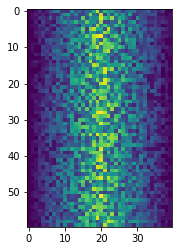

In [33]:
# Plot entire dataset as a heatmap
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show(image)

In [34]:
# Let's make our lives easier with an alias
import matplotlib.pyplot as plt

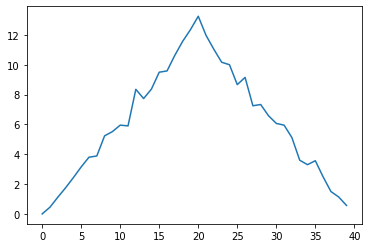

In [35]:
# Plot the mean inflammation per day over all patients
mean_inflammation = numpy.mean(data, axis=0)
mean_plot = plt.plot(mean_inflammation)
plt.show(mean_plot)

This data looks suspicious! I would not expect to find a sharp peak in an average of the dataset. Very unlikely that the inflammation of all patients spikes on day 18. Let's look at two other statistics: max and min

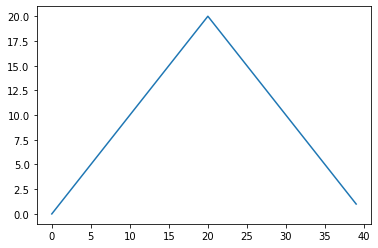

In [36]:
max_plot = plt.plot(numpy.max(data, axis=0))
plt.show(max_plot)

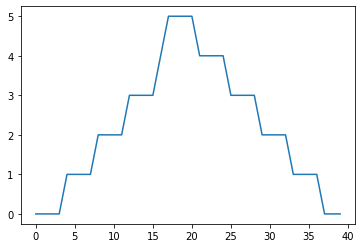

In [37]:
min_plot = plt.plot(numpy.min(data, axis=0))
plt.show(min_plot)

### Create inflammation_analysis.ipynb 

Let's organize our analysis in a new notebook

**Steps:**
1. Set up subplots
2. Load data
3. Plot data
4. Add labels
5. Save the figure

# 4. Repeating Actions with Loops

Incentive: we encounterd some suspicious data and would like to check all datasets. We need a way to automate the process with loops.

In [38]:
odds = [1, 3, 5, 7]

In [39]:
print(odds[0])
print(odds[1])
print(odds[2])
print(odds[3])

1
3
5
7


Bad approach
1. **Not scalable**. Four entries might be doable, hundreds will not!
1. **Difficult to maintain**. If we want to change the print statement, we would need to change it four times. DRY -> Don't Repeat Yourself
1. **Fragile**. If odds changes size, we would need to update the print statement.

In [40]:
# Use a for loop
odds = [1, 3, 5, 7, 9]
for num in odds:
    print(num)

1
3
5
7
9


In [41]:
# The name of the variable is not critical, aim for meaning and readability
for banana in odds:
    print(banana)

1
3
5
7
9


In [42]:
# Let's find the length of a list with a loop
length = 0
names = ['Curie', 'Darwin', 'Turing']
for name in names:
    length = length + 1
print('There are', length, 'names in the list.')

There are 3 names in the list.


In [43]:
# It's worth googling for solutions first
print(len(names))

3


In [44]:
# A variable used inside a loop stills exists after loop completion
name = 'Rosalind'
for name in names:
    print(name)
print('after the loop, the name is', name)

Curie
Darwin
Turing
after the loop, the name is Turing


### Looping over multiple data files

As a final piece to processing our inflammation data, we need a way to get a list of all the files in our data directory whose names start with `inflammation-` and end with `.csv`. The following library will help us to achieve this:

In [45]:
import glob

In [46]:
print(glob.glob('data/inflammation*.csv'))

['data\\inflammation-01.csv', 'data\\inflammation-02.csv', 'data\\inflammation-03.csv', 'data\\inflammation-04.csv', 'data\\inflammation-05.csv', 'data\\inflammation-06.csv', 'data\\inflammation-07.csv', 'data\\inflammation-08.csv', 'data\\inflammation-09.csv', 'data\\inflammation-10.csv', 'data\\inflammation-11.csv', 'data\\inflammation-12.csv']


### Update inflammation_analysis.ipynb 
Add a for-loop to perform the analysis and plotting for all available datasets

# End of part 1